In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

X.shape, y.shape

((100, 1), (100, 1))

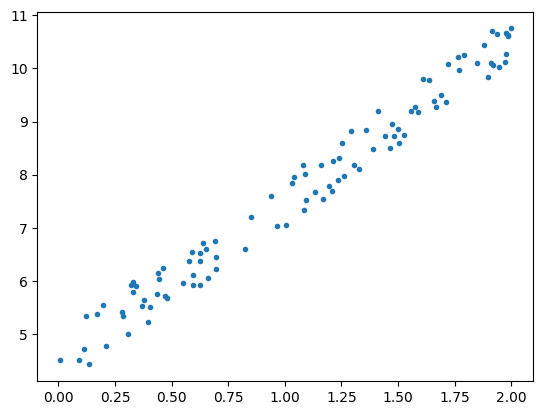

In [4]:
plt.figure()
plt.plot(X, y, ".")
plt.show()

#**Maximum Likelihood Estimation (MLE)**

$$ \mathcal{D} = \{ \textbf{x}_n \in \mathcal{R}^D; \; y_n \in \mathcal \}_{n=1}^N $$
$$ \phi: \mathcal{R}^D \rightarrow \mathcal{R}^Q $$
$$ \phi(\textbf{x}_n) \in \mathcal{R}^Q $$
$$ y_n = \phi(\textbf{x}_n) \textbf{W} $$
$$ \textbf{W} \in \mathcal{R}^Q $$

$$ \textbf{W}^{*} = \underset{\textbf{W}}{argmax} E \{ || \textbf{y} - \Phi \textbf{W}||_{2}^2 \}  $$

$$ \textbf{W}^* = (\Phi^{\top} \Phi)^{-1} \Phi^{\top} \textbf{y} $$


In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [6]:
theta_best

array([[4.48394554],
       [3.01245268]])

In [7]:
X_new   = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)

In [8]:
y_predict

array([[ 4.48394554],
       [10.50885089]])

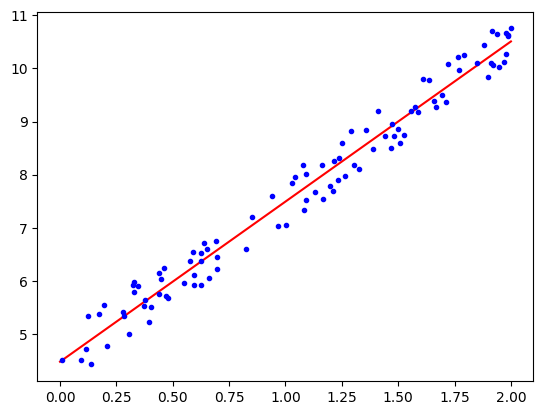

In [9]:
plt.figure()
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

#**Maximum A Posterior (MAP)**

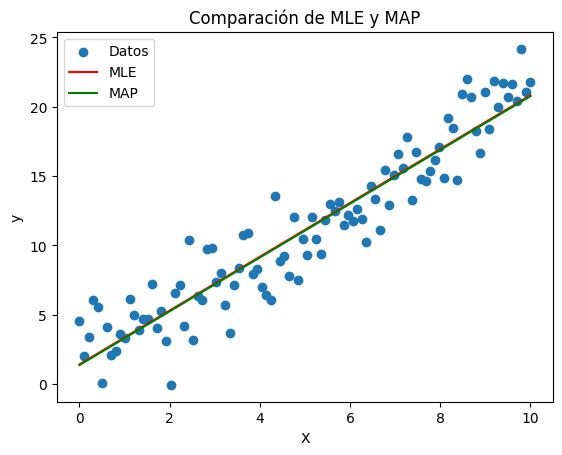

Coeficientes estimados por MLE: 1.9405346270769113 1.4169428956844143
Coeficientes estimados por MAP: 1.9393939393939394 1.3636363636363633


In [10]:
# Generar datos sintéticos
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
y = true_slope * X + true_intercept + np.random.normal(scale=2, size=len(X))

# Definir la función de verosimilitud (likelihood)
def likelihood(X, y, theta):
    slope, intercept = theta
    y_pred = slope * X + intercept
    residuals = y - y_pred
    likelihood = np.prod(1 / np.sqrt(2 * np.pi * 2**2) * np.exp(-(residuals**2) / (2 * 2**2)))
    return likelihood

# Definir la función de log-verosimilitud
def log_likelihood(X, y, theta):
    return np.log(likelihood(X, y, theta))

# Definir la función de prior (MAP)
def prior(theta):
    slope, intercept = theta
    prior_slope = 1 / np.sqrt(2 * np.pi * 1**2) * np.exp(-(slope - 2)**2 / (2 * 1**2))
    prior_intercept = 1 / np.sqrt(2 * np.pi * 1**2) * np.exp(-(intercept - 1)**2 / (2 * 1**2))
    return prior_slope * prior_intercept

# Definir la función de log-prior
def log_prior(theta):
    return np.log(prior(theta))

# Definir la función de posterior (MAP)
def posterior(X, y, theta):
    return likelihood(X, y, theta) * prior(theta)

# Definir la función de log-posterior
def log_posterior(X, y, theta):
    return log_likelihood(X, y, theta) + log_prior(theta)

# Implementar MLE
def mle(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    slope = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    intercept = y_mean - slope * X_mean
    return slope, intercept

# Implementar MAP
def map_estimate(X, y):
    theta_grid = np.meshgrid(np.linspace(0, 4, 100), np.linspace(-5, 5, 100))
    thetas = np.vstack((theta_grid[0].ravel(), theta_grid[1].ravel())).T
    posterior_vals = np.array([posterior(X, y, theta) for theta in thetas])
    max_idx = np.argmax(posterior_vals)
    return thetas[max_idx]

# Ajustar modelos utilizando MLE y MAP
mle_slope, mle_intercept = mle(X, y)
map_slope, map_intercept = map_estimate(X, y)

# Graficar los datos y las líneas de ajuste
plt.scatter(X, y, label='Datos')
plt.plot(X, mle_slope * X + mle_intercept, color='red', label='MLE')
plt.plot(X, map_slope * X + map_intercept, color='green', label='MAP')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación de MLE y MAP')
plt.legend()
plt.show()

print("Coeficientes estimados por MLE:", mle_slope, mle_intercept)
print("Coeficientes estimados por MAP:", map_slope, map_intercept)